## Chapter 6: Modelling Anaerobic Digestion (AD)



<img src="circular.png" width="500" />

So now we have covered the human metabolism and how food is produced. We have also covered the kinetic modelling of a CHON bioreactor and by now you should grasp how maintenanace energy and growth drives the conversion process. It is very important to understand that all energy originates from the sun ☀️. Also important to understand that biomass contains molecules with a carbon backbone that is a potential source of energy. The $CHO$ part of the biomass relates mostly to energy, while the rest of the life supporting elements ($NPSC_aM_gK$ to name a few) can be seen as the elements required to have biomass. In a sense these elements are the 'carriers' of biomass and very important to sustain all life forms.

In the previous chapters we have seen how food is generated and used by humans and annimals. From these processes a lot of waste was generated like non-edible parts of foodcrops, foodwaste, manure and urine. All these waste products can be viewed as biomass that contains $CHO$ for energy and $NPSC_aM_gK$ as the elements that carry biomass. We'll use the term nutrients for the $NPSC_aM_gK$ part of the biomass. These nutrients are of course the fertilizer that plants need to grow. In nature these nutrients are typically returned to the soil where it can nourish new plant growth. In human civilisation a major fraction of these nutrients tend to end up in the groundwater and rivers, with [eutrophication](https://en.wikipedia.org/wiki/Eutrophication) causing major biodiversity loss in water and on land😢.The $CHO$ in the form of organic waste tends to end up in [landfills](https://en.wikipedia.org/wiki/Landfill) where massive amounts of the greenhouse gas methane ends up in the atmosphere as a result. Did you know that methane emissions are only 5 times less than $CO_2$ emissions into the atmosphere and that methane is 28 times more potent as greenhouse gas than $CO_2$?

The future is all about recyling in the [circular economy](https://en.wikipedia.org/wiki/Circular_economy). When it comes to $CHO$ and $NPSC_aM_gK$ this is very important. In this chapter we'll be looking at the $CHO$ part of the waste biomass, and use it to generate energy for human use. We'll be studing the process of [anaerobic digestion](https://en.wikipedia.org/wiki/Anaerobic_digestion).  In this chapter we'll look at anaerobic fermentation and perform some mass balances over an anaerobic digester. It is all about malking methane (in the form of biogas) from organic waste, while simultaneously using the mineral rich [digestate](https://en.wikipedia.org/wiki/Digestate) from the process as fertilizer. Before we go into the process of anaerobic digestion we need to understand something about the world where oxygen is not present. 


### A world without oxygen

The anaerobic world existed before there was oxygen in the atmosphere. Also in today's world there are numerous places on earth where oxygen is absent or very scarce. In these environments anaerobic micro-organisms rule, and unlike their aerobic counterparts these organism have metabolic products other than $CO_2$.

[Video: Anaerobes](https://youtu.be/CGubdD2uFuM)

[Video: Anaerobic respiration](https://youtu.be/6-D1oes63_U)

Numerous aerobic organisms can also do anaerobic respiration, these organism are called [facultative anaerobes](https://en.wikipedia.org/wiki/Facultative_anaerobic_organism). Fermentation or anaerobic respiration is typically explained by using lactic acid and ethanol as end products. Note that these products are formed from pyruvic acid (see glycolysis in [chapter 1](https://nbviewer.org/github/willienicol/CBI310-version2/blob/main/Chapter%201/Chapter%201.ipynb)). Ethanol and lactic acid fermentation is an alternative processing step from pyruvate where a non-$CO_2$ molecule with a carbon backbone is formed as waste product. The examples in chapter 5 is a good illustration of this. With oxygen availability the TCA cycle and oxidative phosphorilation is used to process pyruvic acid in aerobic organisms, while with anaerobic respiration these steps are excluded. Go back to glycolysis in chapter 1 and understand that the only ATP that ethanol (or lactic) acid fermentation gains is from glycolysis itself. The $\frac{1}{3}$ ATP per cmol of glucose used in the exersize of chapter 5 is derived from glycolysis, important to understand this. Also important to understand that aerobic processes tend to generate an order of magnitude (10 times) more ATP than an anaerobic process. As example compare the  $\frac{1}{3}$ ATP from ethanol fermentation to the  $\frac{21}{6}=3.5$ mol ATP from respiration considered in chapter 1.

<img src="anaer1.jpeg" width="500" />


There are a multitude of anaerobic breakdown reactions and it is important to understand that ethanol and lactic acid are not the only anaerobic metabolites. One very interesting group of organisms is the [methanogens](https://en.wikipedia.org/wiki/Methanogen). These organisms are all from the [Archaea](https://en.wikipedia.org/wiki/Archaea) domain and play an important role in anaerobic digestion. In a sense the methane produced from methanogens are similar to the lactic acid produced by lactic acid bacteria, it all happens in an anaerobic environment where the main purpose of the fermentation is for the organisms to obtain energy (ATP) in order to grow($\mu$) and maintain itself($\theta$). Methane like lactic acid has a carbon backbone and can be futher metabolised in an aerobic environment to $CO_2$ to obtain more energy (ATP from the mitochondria). Methane can off course also be burned to cook food or used to make electricity, the result is that $CO_2$ forms in the process of generating energy for humans. Below a schematic of a methanogen where the unique membrane structure of Archaea is shown:  

<img src="methano.jpeg" width="400" />

### Anaerobic digestion



Anaerobic digestion of AD is a very natural process. The digestive system of a cow entails AD where vast amounts of methane is produced. Did you know that methane emissions from cows has a significant influence on climate change? This [article](https://letstalkscience.ca/educational-resources/stem-in-context/cows-methane-and-climate-change) will give you some numbers. Whenever dead biomass is left in an anaerobic environment, methane production will result. Landfills are a prime example and it is estimated that [11% of global methane emissions comes from landfills](https://www.reuters.com/business/environment/landfills-around-world-release-lot-methane-study-2022-08-10/). 

When we modelled the human body we did not get into all the intricate details of our systems, we rather used an overall of 'black box' approach. We will start our approach to AD in a similar manner, but will include the energy balance and rate expressions with the mass balance (like we have done in chapter 5). The [Wikipedia article on AD](https://en.wikipedia.org/wiki/Anaerobic_digestion) is worth exploring for more background information. In short the overall reaction entails the breakdown to soluable monomers (hydrolysis), the breakdown of monomers to short chain fatty acids (acidogenesis), the breakdown of fatty acids to acetic acid (acetogenesis) and lastly the formation of methane and $CO_2$ via the process of methanogenesis. Below an image of a contained and controlled AD:

<img src="ad1.jpg" width="400" />

The overall reaction for AD can be written as follow:

$$S→X+CH_4+CO_2+NH_3+H_2O+R$$

$S$ refers to the biomass that is fed to the fermenter (substrate), $X$ is the bacterial biomass that grows from digesting the substrate, while $R$ is the recalcitrant solid fraction that consists mainly out of lignocellulose that cannot be digested in anaerobic conditions. The biomass ($X$) consists out of various organism performing hydrolysis, acedogenesis, acetogenesis and methanogenosis. Note that we will only work with final products and ignore intermediates like amino acids, sugar monomers and fatty acids.

Apart from the breakdown of substrate, dead biomass can also be digested according to the following reaction:

$$X→CH_4+CO_2+NH_3+H_2O$$

Microbial cells can fully decompose without leaving a recalcitrant fraction behind. Let's start with the CHON matices of these two reactions

In [2]:
import numpy
import pandas

S1 = numpy.matrix(pandas.read_excel('matdig1.xlsx'))
S1   

matrix([[ 1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ],
        [ 1.7 ,  1.8 ,  4.  ,  0.  ,  2.  ,  3.  ,  1.7 ],
        [ 0.55,  0.5 ,  0.  ,  2.  ,  1.  ,  0.  ,  0.75],
        [ 0.04,  0.08,  0.  ,  0.  ,  0.  ,  1.  ,  0.02],
        [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.1 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ],
        [-0.45, -1.8 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

<img src="mat1.png" width="700" />


Note that 0.45 mol ATP forms per cmol of substrate in this example, this is slightly more than the exercize in chapter 5. The energy requirements for growth isstill 1.8 mol ATP per cmol of cells(X) formed.We'll use a maintenance rate of 1 $\frac{mmmol}{g \,X \cdot h}$ which will give:

In [3]:
thetamax=1/1000*(12+1.7+16*0.55+14*0.04)*24
thetamax

0.55344

Specification 2 states that 10% of the substrate (on cmol basis) is not digestable,thus:

$$r_R=-0.1r_S$$

Lastly we need to specify the growth rate fro the microbial population. Growth rates in anaerobic digesters tends to be very slow, well use a value of $\mu=0,05 \, \frac{1}{day}$.


In [15]:
mumax=0.05 #1/day

If substrate is available the rates of the **first equation** can be determined:

In [16]:
C1= numpy.matrix([0, 0, 0,0,mumax,0,thetamax]).T

r1 = numpy.linalg.solve(S1,C1)
r1

matrix([[-1.42986667],
        [ 0.05      ],
        [ 0.69822973],
        [ 0.53865027],
        [-0.42311387],
        [ 0.05033493],
        [ 0.14298667]])

From the above you should understand that $-r_S=1.42 \frac{cmol \, S}{cmolX \,day}$. The cmol basis originates from the $\mu$ specification with units $\frac{cmolX}{cmolX \, day}$.Note that the rate of methane production is $r_M=0.698 \frac{cmol \, CH_4}{cmolX \,day} $. Similar units will be used for the other components.

We also have to consider **equation 2** where biomass decomposes. For this reaction we'll use the following relationship:

$$r_{death}=\mu_D  \,\,\,\ \frac{cmol\,X}{cmol\,X\,\,day}$$

Note that the death rate ($\mu_D$) will have a negative sign.

The matrix for microbial decomposition is given by:





In [17]:
S2 = numpy.matrix(pandas.read_excel('matdig2.xlsx'))
S2

matrix([[1.  , 0.  , 1.  , 1.  , 0.  ],
        [1.8 , 3.  , 4.  , 0.  , 2.  ],
        [0.5 , 0.  , 0.  , 2.  , 1.  ],
        [0.08, 1.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  , 0.  ]])

<img src="mat2.png" width="600" />

Let's solve for the matrix when substrate is avaialble:

In [18]:
muDmax=-0.01
C2= numpy.matrix([0, 0, 0,0,muDmax]).T

r2 = numpy.linalg.solve(S2,C2)
r2

matrix([[-0.01  ],
        [ 0.0008],
        [ 0.0057],
        [ 0.0043],
        [-0.0036]])

Note that there is now two reactions. We'll require the overall rate of a component given by the two reactions. The overall rate of biomass accumulation and methane production will be given by:

In [19]:
rx=r1[1,0]+r2[0,0]
rm=r1[2,0]+r2[2,0]
[rx,rm] #cmol/(cmolX.day)

[0.039999999999999966, 0.7039297333333334]

We are now ready to model the digester, we just have to define how $\mu$,$\theta$ and $\mu_D$ will change if the substrate concentration ($C_S$) is low. We'll use the Monod relationship:

$$\mu=\mu_{max}\frac{Cs}{K_{\mu}+Cs}$$
$$\theta=\theta_{max}\frac{Cs}{K_{\theta}+Cs}$$
$$\mu_D=\mu_{D\,max}\frac{Cs}{K_{\mu_D}+Cs}$$

For now we will assume the same Monod constant for these rate variables where $K_i=0.001  \frac{cmol}{L}$

Let's see how them bugs digest our waste:


In [20]:
def response_fun(C):
    
    Cs, Cx, Cch4, Cco2, Cnh3, Cr = C[0],C[1],C[2],C[3],C[4],C[5]
    
    
    Km=0.05  #cmol/L
    
    mu= mumax*Cs/(Km+Cs)
    muD=muDmax*Cs/(Km+Cx)
    theta=thetamax*Cs/(Km+Cx)

    C1 = numpy.matrix([[0,0,0,0,mu,0,theta]]).T  #Growth rate specified
    C2 = numpy.matrix([[0,0,0,0,muD]]).T   #Death rate specified

    r1 = numpy.linalg.solve(S1,C1)
    r2 = numpy.linalg.solve(S2,C2)
    
    return [r1[0,0],           # rs
            r1[1,0]+r2[0,0],   # rx
            r1[2,0]+r2[2,0],   # rch4
            r1[3,0]+r2[3,0],   #rco2
            r1[5,0]+r2[1,0],   #rnh3
            r1[6,0]]           #rr   

The fermentation function below is where we will use the mole balance equations, for now we are sticking with a batch fermenter so that:

\begin{align*}
\frac{dC_i}{dt} &= r_i C_X \\
\end{align*}



In [21]:
def ferm_eq(C,t):
    Cs, Cx, Cch4, Cco2, Cnh3, Cr = C[0],C[1],C[2],C[3],C[4],C[5]  # order of components very important 
    r=response_fun([Cs, Cx, Cch4, Cco2,Cnh3,Cr])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx,
            r[1]*Cx,    
            r[2]*Cx,
            r[3]*Cx,
            r[4]*Cx,
            r[5]*Cx];   

Assume that we innoculate with 20 g/L of substate and 0.5 g/L of living cells:

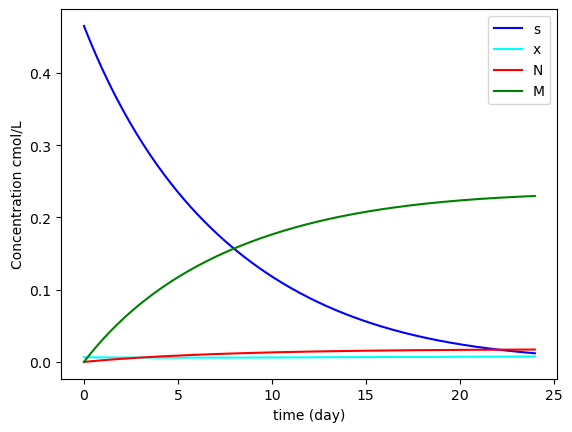

In [22]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

MMs=12+S1[0,1]+S1[0,2]*16+S1[0,3]*14
MMx=12+S1[1,1]+S1[1,2]*16+S1[1,3]*14

Cso=20/MMs
Cxo=0.5/MMx

Co=[Cso,Cxo,0,0,0,0]                     
tmax=24                                    # Integrate for 20 hours  
tspan=numpy.linspace(0,tmax,200)           # define the timespan of the integration
C = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls apon ferm_eq

Cx=C[:,1]                                  
Cs=C[:,0]
Cch4=C[:,2]
Cco2=C[:,3]
Cnh3=C[:,4]
Cr=C[:,5]

plt.plot(tspan, Cs, color='blue', label='s')
plt.plot(tspan, Cx, color='cyan', label='x')
plt.plot(tspan, Cnh3, color='red',label='N')
plt.plot(tspan, Cch4, color='green',label='M')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (day)') 
plt.show()